In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
path = 'data'
files = os.listdir(path)
print (files)

['0_025.phc', '0_05.phc', '0_10.phc', '0_15.phc', '0_20.phc', '0_25.phc', '0_30.phc', '0_40.phc', '水.phc']


In [3]:
def loaddata(file):
    points = []
    with open('data/'+file) as f:
        line = f.readline()
        while line:
            data = line.split(',')
            point = []
            for j in range(len(data)):
                point.append(float(data[j]))
            line = f.readline()
            points.append(point)
    return np.array(points)

In [4]:
def nlarge(n,Vs):
    nums=Vs.tolist()
    temp = []
    Inf = -10000
    for i in range(n):
        temp.append(nums.index(max(nums)))
        nums[nums.index(max(nums))] = Inf
    return temp
def nsmall(n,Vs):
    nums=Vs.tolist()
    temp = []
    Inf = 10000
    for i in range(n):
        temp.append(nums.index(min(nums)))
        nums[nums.index(min(nums))] = Inf
    return temp

In [5]:
# 调用线性回归模型并在 ax 上绘图(数据处理)
def regression(Ts,Vs,ax,fig,c):
    lr = LinearRegression()
    Ts = Ts.reshape(-1, 1); Vs = Vs.reshape(-1,1)
    minmax_point = ax.scatter(Ts, Vs, c=c, s=30, alpha=0.6, edgecolors='none')

    lr.fit(Ts,Vs) # 训练模型
    R2 = 1 - lr.score(Ts,Vs) # 计算 R2
    left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
    rect_text = [left + width*0.55, bottom+height*0.6]
    text = 'Determination factor '+r'$(R^2)$' +' is ' + str(format(R2, '.4f'))
    ax.annotate(text, xy=(np.average(Ts), np.average(Vs)), xytext=(np.average(Ts)-0.1, np.average(Vs)-0.014),color=c,fontsize=16, arrowprops=dict(facecolor=c, shrink=0.05))
    length = np.max(Ts) - np.min(Ts)
    min_1 = np.min(Ts) - (length*100)**0.25; max_1 = np.max(Ts) + (length*100)**0.25

    Ts = np.row_stack((Ts,[min_1])); Ts = np.row_stack((Ts,[max_1]))
    Vs_hat = lr.predict(Ts) # 计算 Vs_hat
    ax.plot(Ts, Vs_hat, c=c, alpha =0.6, linewidth=1)
    
    return minmax_point

In [6]:
def plot(Ts, Vs, name):
    name = name.replace('.phc', '')
    left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
    rect = [left*0, bottom, width, height]; rect_text = [left + width*0.55, bottom+height*0.7]
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_axes(rect)
    ax.plot(Ts, Vs, c='k')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlabel('time（s）',fontsize=16)
    ax.set_ylabel('Voltage（mV）',fontsize=16)
    n = 80
    max_indexs = nlarge(n,Vs); max_Vs = Vs[max_indexs]
    min_indexs = nsmall(n,Vs); min_Vs = Vs[min_indexs]
    max_min = np.average(max_Vs) - np.average(min_Vs)
    # 打印出图
    text = r'$V_{max} - V_{min}\; is \,$ ' + str(format(max_min, '.4f'))
    fig.text(rect_text[0], rect_text[1], text = text, s=30, fontsize=20)
    min_point = regression(Ts[min_indexs], Vs[min_indexs], ax, fig, c='b')
    max_point = regression(Ts[max_indexs], Vs[max_indexs], ax, fig, c='r')
    
    plt.legend([min_point,max_point],['min point','max point'], fontsize=16)
    
    plt.savefig('img/'+name,bbox_inches='tight')
    return max_min

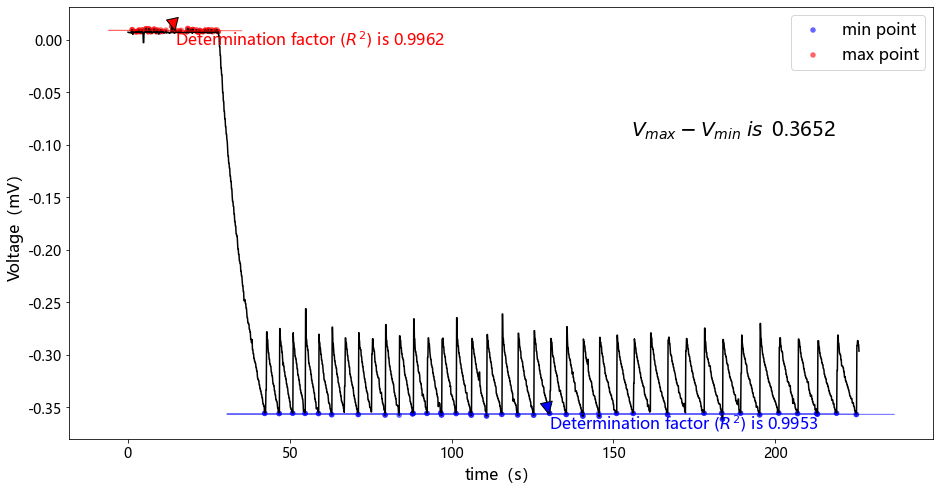

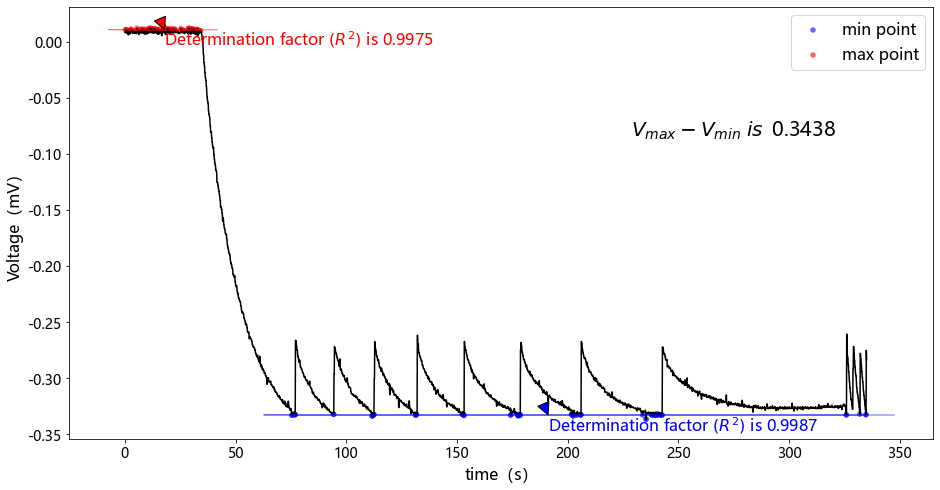

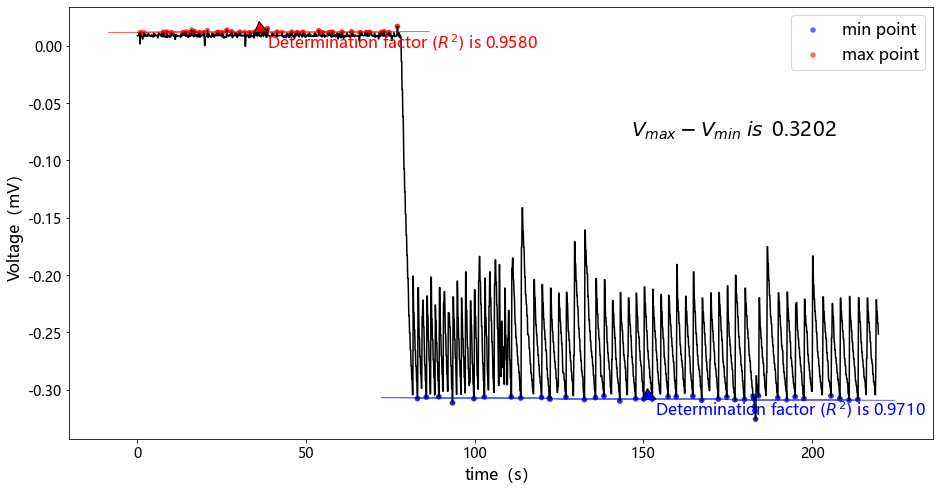

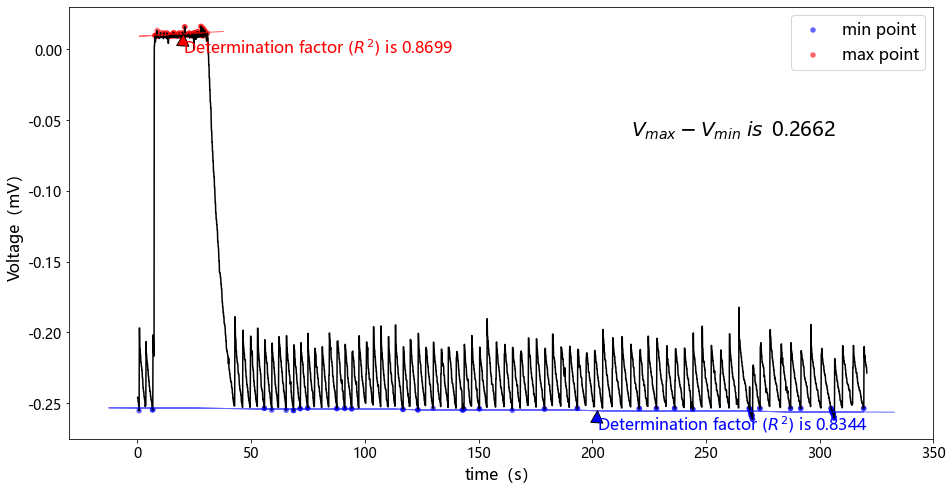

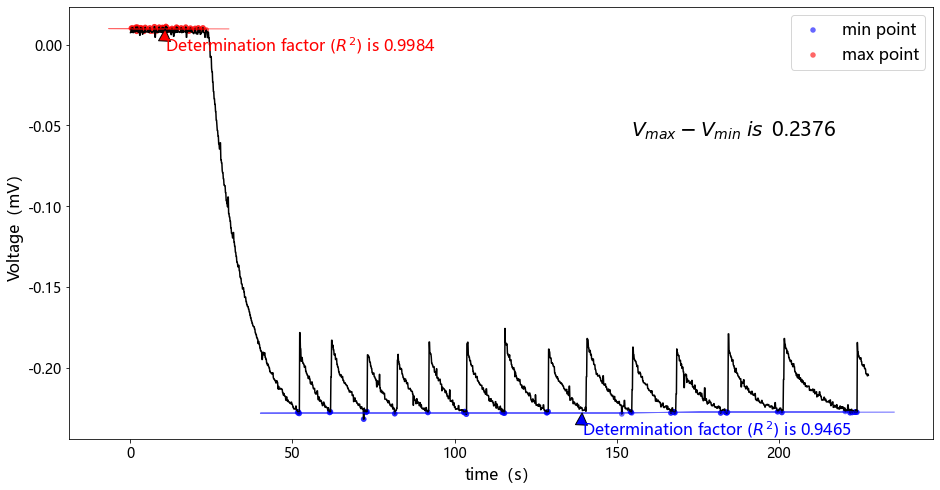

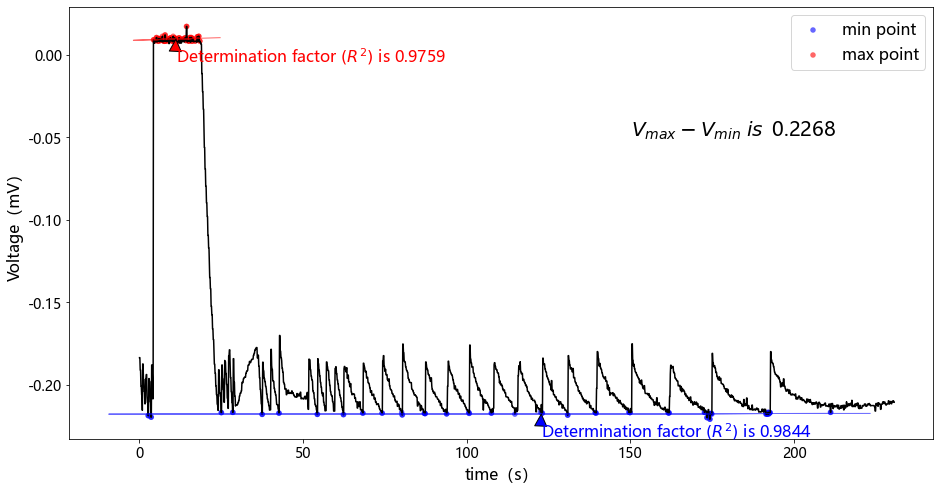

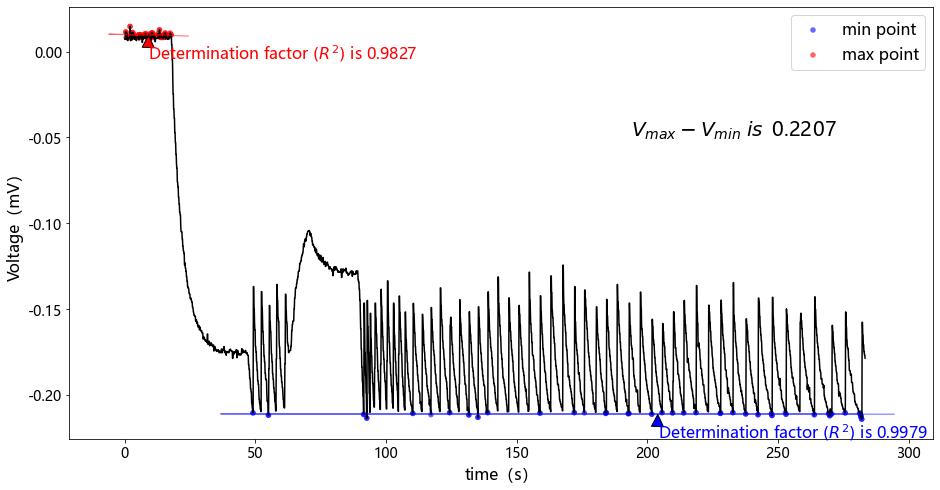

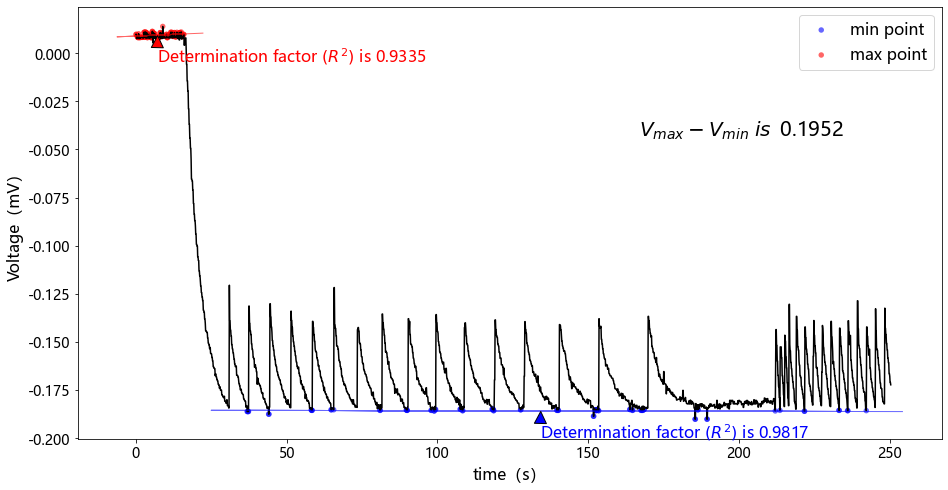

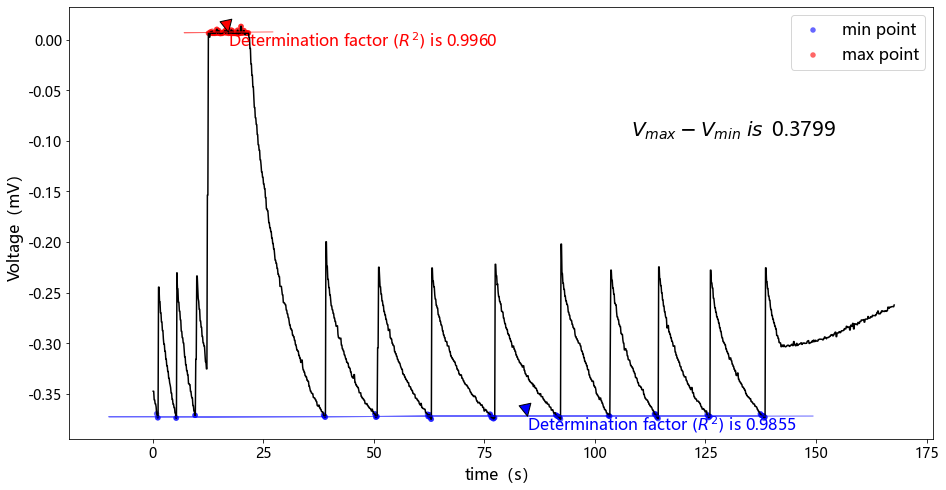

In [7]:
max_mins = []
for file in files:
    points = loaddata(file)
    Ts = points.T[0]; Vs = points.T[1]
    max_min = plot(Ts, Vs, name=file)
    max_mins.append(max_min)